# Customer Segments Based on RFM (Recency, Frequency, Monetary Value) Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/nehue/Documents/programas_de_python/machine_learning/my_projects/customer_segmentation/data/raw/Online Retail.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Preprocessing and feature engineering

In [4]:
from datetime import datetime

In [5]:
purchase_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['max'])["max"].max()

In [6]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [7]:
dfc = df.copy()

In [8]:
df = dfc

In [9]:
# Recency

purchase_dates = df.groupby('CustomerID')['InvoiceDate'].agg(['max'])

purchase_dates['Recency'] = (datetime(day=10, month=12, year=2011) - purchase_dates['max']).dt.days

df = pd.merge(df, purchase_dates['Recency'], on='CustomerID')

In [10]:
# Frequency

transactions = df.groupby(['CustomerID'])["InvoiceNo"].count()

transactions = transactions.to_frame()

transactions.columns = ["Frequency"]

df = pd.merge(df, transactions, on='CustomerID')

In [11]:
# Monetary Value

df["TotalAmount"] = df['Quantity'] * df['UnitPrice']

total_spent_per_customer = df.groupby('CustomerID')['TotalAmount'].sum()

total_spent_per_customer = total_spent_per_customer.to_frame()

df = pd.merge(df, total_spent_per_customer['TotalAmount'], on='CustomerID')

In [12]:
df.drop(columns=["TotalAmount_x"], inplace=True)

In [13]:
df.rename(columns={'TotalAmount_y': 'monetary_value'}, inplace=True)

In [14]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,monetary_value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,302,312,5288.63
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,302,312,5288.63
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,302,312,5288.63
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,302,312,5288.63
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,302,312,5288.63
...,...,...,...,...,...,...,...,...,...,...,...
406824,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,0,38,848.55
406825,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,0,38,848.55
406826,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,0,38,848.55
406827,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,0,38,848.55


In [15]:
df.drop(columns=["InvoiceNo", "Description", "StockCode", "Quantity", "InvoiceDate", "UnitPrice"], inplace=True)

df = df.groupby('CustomerID').apply(pd.DataFrame).reset_index().drop_duplicates()

df.drop(columns=["CustomerID"], inplace=True)

C:\Users\nehue\AppData\Local\Temp\ipykernel_11868\558601968.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby('CustomerID').apply(pd.DataFrame).reset_index().drop_duplicates()


In [16]:
df.drop(columns=["index"], inplace=True)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
# Countries

df = pd.get_dummies(df, columns=['Country'])

In [19]:
df

,Recency,Frequency,monetary_value,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,302,312,5288.63,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
312,31,196,3079.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
508,2,251,7187.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
759,95,28,948.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
787,330,6,635.10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406747,1,12,196.89,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
406759,1,18,343.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
406777,1,2,360.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
406779,1,12,227.39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Exploratory Data Analysis (EDA)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4380 entries, 0 to 406791
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Recency                       4380 non-null   int64  
 1   Frequency                     4380 non-null   int64  
 2   monetary_value                4380 non-null   float64
 3   Country_Australia             4380 non-null   uint8  
 4   Country_Austria               4380 non-null   uint8  
 5   Country_Bahrain               4380 non-null   uint8  
 6   Country_Belgium               4380 non-null   uint8  
 7   Country_Brazil                4380 non-null   uint8  
 8   Country_Canada                4380 non-null   uint8  
 9   Country_Channel Islands       4380 non-null   uint8  
 10  Country_Cyprus                4380 non-null   uint8  
 11  Country_Czech Republic        4380 non-null   uint8  
 12  Country_Denmark               4380 non-null   uint8  
 13  C

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = df[df["Frequency"] < 300]

In [23]:
df = df[df["monetary_value"] < 10_000]
df = df[df["monetary_value"] > 0]

In [24]:
df.reset_index(inplace=True)

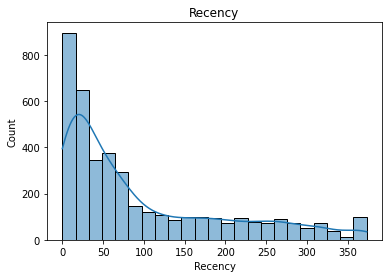

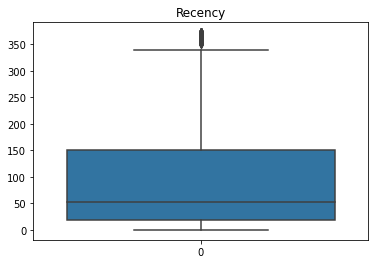

In [25]:
# Histogram for TotalSpend
sns.histplot(df['Recency'], kde=True)
plt.title('Recency')
plt.show()

# Boxplot for Quantity
sns.boxplot(df['Recency'])
plt.title('Recency')
plt.show()

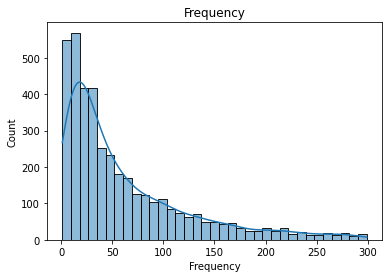

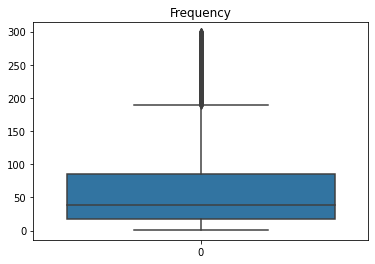

In [26]:
sns.histplot(df['Frequency'], kde=True)
plt.title('Frequency')
plt.show()

# Boxplot for Quantity
sns.boxplot(df['Frequency'])
plt.title('Frequency')
plt.show()

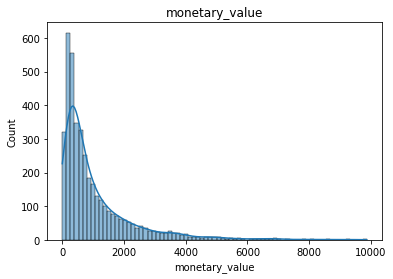

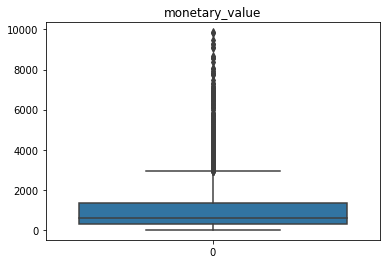

In [27]:
sns.histplot(df['monetary_value'], kde=True)
plt.title('monetary_value')
plt.show()

# Boxplot for Quantity
sns.boxplot(df['monetary_value'])
plt.title('monetary_value')
plt.show()

In [28]:
country_col = []

for col in df.columns.to_list():

    if "country" in col.lower():

        country_col.append(col)

In [29]:
countries = df[country_col].sum()

In [30]:
countries.to_frame()

,0
Country_Australia,8
Country_Austria,11
Country_Bahrain,2
Country_Belgium,25
Country_Brazil,1
Country_Canada,4
Country_Channel Islands,8
Country_Cyprus,8
Country_Czech Republic,1
Country_Denmark,9


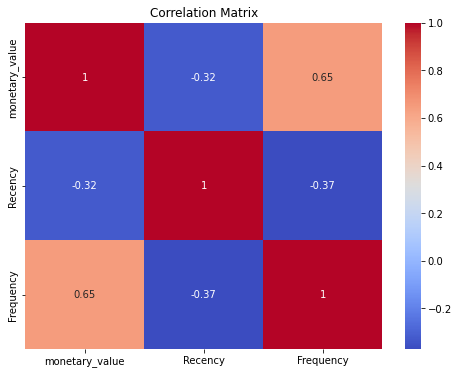

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['monetary_value', 'Recency', 'Frequency']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Z-score to detect outliers

from scipy.stats import zscore

df['z_score_monetary'] = zscore(df['monetary_value'])
df['z_score_frequency'] = zscore(df['Frequency'])
df['z_score_recency'] = zscore(df['Recency'])

# Filter out outliers
df_no_outliers = df[(df[['z_score_monetary', 'z_score_frequency', 'z_score_recency']] < 3).all(axis=1)]


In [35]:
df = df_no_outliers

In [ ]:
df["log_mv"] = np.log10(df["monetary_value"])
df["log_fr"] = np.log(df["Frequency"])

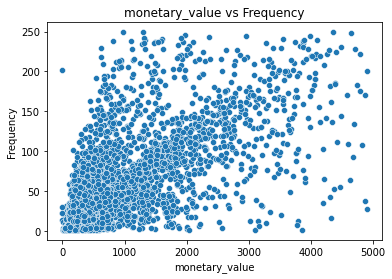

In [37]:
sns.scatterplot(x='monetary_value', y='Frequency', data=df)
plt.title('monetary_value vs Frequency')
plt.show()

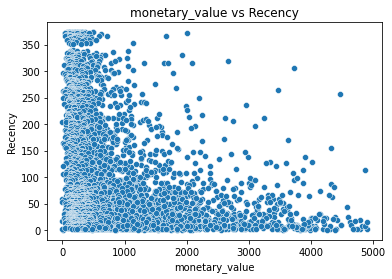

In [38]:
sns.scatterplot(x='monetary_value', y='Recency', data=df)
plt.title('monetary_value vs Recency')
plt.show()

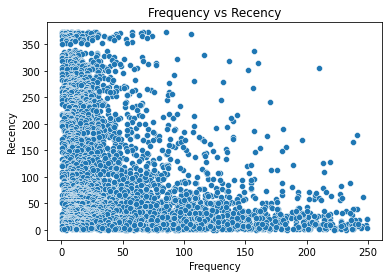

In [39]:
sns.scatterplot(x='Frequency', y='Recency', data=df)
plt.title('Frequency vs Recency')
plt.show()

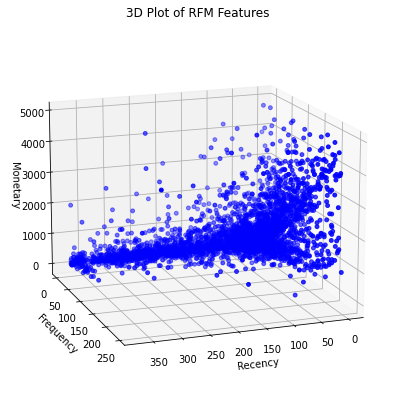

In [53]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Recency'], df['Frequency'], df['monetary_value'], c='blue', s=15, )

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(elev=15, azim=70)

ax.set_title('3D Plot of RFM Features')
plt.show()